# Project: Medical Appointment No-Shows
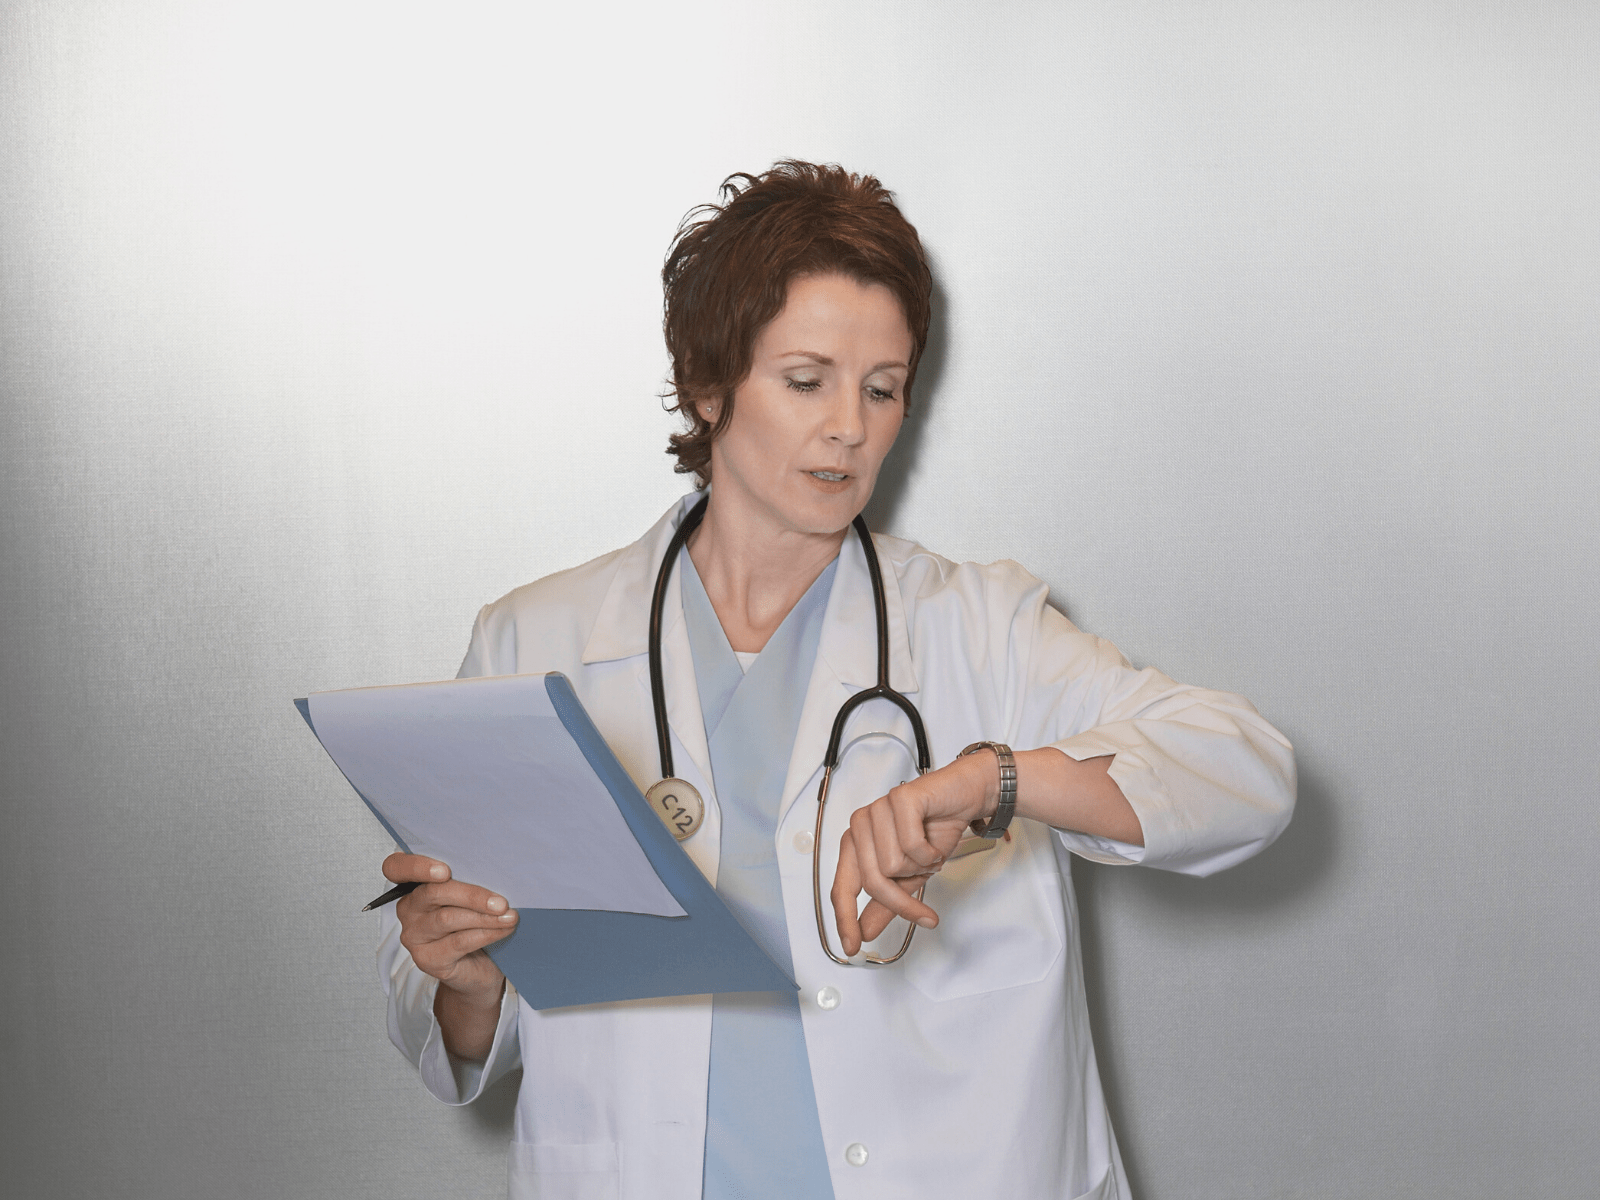

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset focuses on the issue of whether or not people showed up for their appointment and compiles data from approximately 100,000 medical appointments in Brazil. Each row contains a number of patient-related characteristics. 

|Feature||Description|
|-----||----|
|PatientId||Patient identification|
|AppointmentID||Appointment identification|
|Gender||Gender of Patient (Male or Female).|
|ScheduledDay||The day patient set up their appointment.|
|AppointmentDay||The actual actual appointment day when patient have to visit the doctor.|
|Age||Patient Age|
|Neighbourhood||The location of the hospital.|
|Scholarship||Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família(0 for no and 1 for Yes).|
|Hipertension||Indicates whether or not the patient has hypertension or not(0 for no and 1 for Yes).|
|Diabetes||Indicates whether or not the patient is diabetic (0 for no and 1 for Yes).|
|Alcoholism||Indicates whether or not patient is alcoholic (0 for no and 1 for Yes).|
|Handicap||Indicates whether or not the patient is handicap (on scale from 0 to 4 ).|
|SMS_received||Indicates whether or not the patient received SMS (0 for no and 1 for Yes).|
|No-show||Indicates whether or not the patient showed for the appointment(Yes for didn't show, No for show).|

This project is focused on answering the following questions;

1. What are the percentages of patients who showed up and those who did not ?
2. Which gender shows up for appoinment the most?
3. Do patients with hadicap show up or not and what is their show up rate as compared with patients without handicap?
4. Do alcoholic patients show up for their medical appointments not and what is their show up rate as compared with patients who are not alcoholic?
5. Do Diabetic patients show up for medical appointments and what is their show up rate as compared with patients without Diabetes?
6. Do Scholarship holding patients show up for medical appointments and what is their show up rate as compared with patients who are not on scholarship?
7. Do patients who receive SMS show up for medical appointments and what are their show up rate as compared with patients who do not receive SMS?
8. Do patients who have Hypertension show up for medical appointmentsand what are their show up rates compared with patients who do not have Hypertension?
9. The Seniors and the youth who is more concern about their health?
10. What are the correlation between relevant variables?

In [1]:
# import analysis packages
import pandas as pd
import numpy as np
import datetime as dt

# Visualization packages:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

This section is a 3 phase process that include data gathering, assessing and cleaning. 

1. The gathering phase is focused on collecting, organising and importing the required data needed to answer the project questions including understanding the features and response variables and the information they hold.
2. Data assessing stage evaluates the dataset to find any problems with data,specifically, issues with data types, structure or data quality.
3. The cleaning phase ensures a well-structured and highest quality dataset and this is achieved by modifying, replacing, or removing data. 

### General Properties (Data Gathering)

In [2]:
# Load the data and print the first few rows
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# check number of rows and columns
print(f'The dataset has {df.shape[1]} columns and {df.shape[0]} rows')

The dataset has 14 columns and 110527 rows


In [4]:
# check column names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### Assessing the Data

In [5]:
# Check the data types of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

From the output above,

It can be observed that PatientId  and AppointmentID are of type float and int datatypes. This will present issues when perfoming arithmetic operations on these columns.These columns need to be changed to string data type.

ScheduledDay and AppointmentDay are of type objects instead of datetime.

Scholarship, Hipertension, Diabetes, Alcoholism, Handicap and SMS_received are of type int.

Gender and Neighbourhood are of type strings with Age being int which are the required datatype for these three columns.

No-Show column is of type string.

In [6]:
# check for duplicates
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [7]:
# check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The dataset has no missing values.

In [8]:
# check summary statistics for all columns
df.describe().round()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.0,110527.0,110527.0,110527.0,110527.0,110527.0,110527.0,110527.0
mean,1.474963e+14,5675305.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.560949e+14,71296.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.921800e+04,5030230.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.172614e+12,5640286.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.173184e+13,5680573.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,9.439172e+13,5725524.0,55.0,0.0,0.0,0.0,0.0,0.0,1.0
max,9.999816e+14,5790484.0,115.0,1.0,1.0,1.0,1.0,4.0,1.0


From the summary statistics above,

The average age was 37, the maximum age recorded was 115 and the minimum age was -1. Age is a non-negative integer. The negative value could be interpreted in a number of ways.That is either it was an erroneous entry or the value was not available or prenatal care. Also, there is no clear information concerning how unavailabe data is represented in the data dictionary.

For a maximum age of 115 years, there is a possibility since there are records showing humans leave beyond 120 years.

Also, Handicap column recorded a maximum value of 4 which is different from the other ailments. This is correct since Handcap checks the patients level of Handicap on a scale of 0 to 4.

In [9]:
# check rows with age less than 0
df.query('Age<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


From the above table, there is only a single row with age less than zero. Though the other columns for this row contain vital information, dropping a single row out of 100,000 plus rows will not have a significant effect on the analysis. Hence we drop the row with age equal -1.  

In [10]:
# Check unique values of the columns
print(f'Unique values of the Gender column are: {df.Gender.unique()}')
print(f'Unique values of the Scholarship column are: {df.Scholarship.unique()}')
print(f'Unique values of the Hipertension column are: {df.Hipertension.unique()}')
print(f'Unique values of the Alcoholism column are: {df.Alcoholism.unique()}')

Unique values of the Gender column are: ['F' 'M']
Unique values of the Scholarship column are: [0 1]
Unique values of the Hipertension column are: [1 0]
Unique values of the Alcoholism column are: [0 1]


In [11]:
# Check unique values of the columns
print(f'Unique values of the Diabetes column are: {df.Diabetes.unique()}')
print(f'Unique values of the Handcap column are: {df.Handcap.unique()}')
print(f'Unique values of the SMS_received column are: {df.SMS_received.unique()}')
print(f'Unique values of the SMS_received column are: {df.SMS_received.unique()}')

Unique values of the Diabetes column are: [0 1]
Unique values of the Handcap column are: [0 1 2 3 4]
Unique values of the SMS_received column are: [0 1]
Unique values of the SMS_received column are: [0 1]


In [12]:
# check unique values 
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
# Check unique values of the columns
print(f'Unique values of the Neighbourhood column are: {df.Neighbourhood.unique()}')

Unique values of the Neighbourhood column are: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CR

From the above outputs there are distict (unique) and uniform entries for each column.

### Data Cleaning 
The following modifications and changes will be made to the columns of the dataset;

1. Changing PatientId and AppointmentID columns to string data type.
2. Changing ScheduledDay and AppointmentDay to datetime data type.
3. Dropping th row with age equal -1.
4. Renaming columns to correct typos in column names.
5. Changing No-show column name to Showed_up and replacing Yes with No and No with Yes. 

In [14]:
# 1. Changing PatientId and AppointmentID columns to string data type.
df.PatientId = df.PatientId.astype(str)
df.AppointmentID = df.AppointmentID.astype(str)

In [15]:
# check if the changes took effect
df.AppointmentID.dtype

dtype('O')

In [16]:
# 2. Changing ScheduledDay and AppointmentDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [17]:
# checking dtype of ScheduledDay
df.ScheduledDay.dtype

datetime64[ns, UTC]

In [18]:
# 3.Dropping row with age =-1
df.drop(df[df['Age']< 0].index, inplace = True)

In [19]:
# check if changes have taken effect
df[df.Age<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [20]:
# 4. Renaming columns
# 5. Changing No-show column name to Show_Up 
df.rename(columns = {'No-show' : 'Showed_up','Handcap':'Handicap',
                     'Hipertension':'Hypertension',
                     'ScheduledDay':'Scheduled_Day',
                     'AppointmentDay':'Appointment_Day'},inplace=True)

In [21]:
# Check Column names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'Showed_up'],
      dtype='object')

In [22]:
# Check counts of values
df.Showed_up.value_counts()

No     88207
Yes    22319
Name: Showed_up, dtype: int64

In [23]:
# 5. Replacing Yes with No and No with Yes
df['Showed_up'] = df['Showed_up'].apply(lambda x : 'Yes' if x =='No' else 'No' )

In [24]:
# check if counts are still the same
df.Showed_up.value_counts()

Yes    88207
No     22319
Name: Showed_up, dtype: int64

In [25]:
# check data types
df.dtypes

PatientId                       object
AppointmentID                   object
Gender                          object
Scheduled_Day      datetime64[ns, UTC]
Appointment_Day    datetime64[ns, UTC]
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hypertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handicap                         int64
SMS_received                     int64
Showed_up                       object
dtype: object

Data is now cleaned to use for analysis.

<a id='eda'></a>
## Exploratory Data Analysis(EDA)

The dataset is explored to maximize the potential of the analyses. This involves finding patterns in the data, visualizing relationships in the data and building intuition.

### 1.  What are the percentages of patients who showed up and those who did not ?

In [26]:
# Number of patients who showed and did not show
df.Showed_up.value_counts()

Yes    88207
No     22319
Name: Showed_up, dtype: int64

In [27]:
# Percentage of Patients who showed and did not show
(df.Showed_up.value_counts()*100/df.shape[0]).round(1)

Yes    79.8
No     20.2
Name: Showed_up, dtype: float64

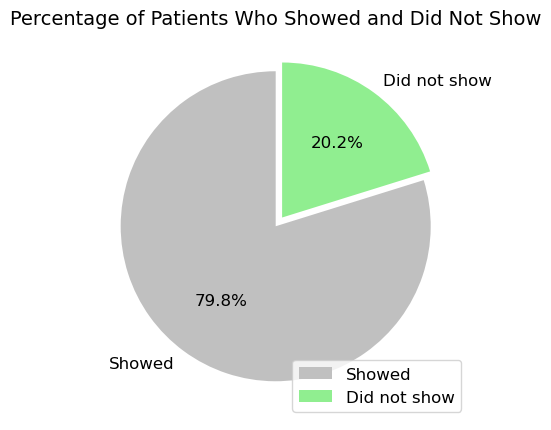

In [28]:
# visulise the percentages of patients who showed and did not showb
plt.figure(figsize=(5,8))
plt.pie(df.Showed_up.value_counts(), labels=['Showed','Did not show'],
        autopct='%1.1f%%',textprops={'fontsize': 12},
        explode = (0, 0.07),startangle= 90, 
        colors=['Silver','lightgreen'])
plt.rcParams['font.size'] = 12
plt.title('Percentage of Patients Who Showed and Did Not Show',fontsize=14)
plt.legend(loc='lower right')
plt.show()

Out of a total of 110527 patients who booked appointment, 80% constituting 88208 showed for the appointment and 20% constituting 22319 did not show for the appointment.

#### Creating a function for visualisation. 

In [29]:
# creating a function to visualize the show_up (response) rate in percentage 
# by a particular feature or column.

def visualize(df, feature):
    
    """"  
    Returns a visualisation of the Show up rate by a feature(column) 
    of the dataframe. 
    
    Returns the Show up rates of the feature.
    
    Returns the total number of patients for each category under the feature.
    
    Takes two arguments, df and feature.
    
    df: The dataframe containing the feature and response.
    
    feature: A column or an independent variable in the dataframe.
    
    
    """
    
    # groupy feature and display value count of showed_up
    values = pd.DataFrame(df.groupby(feature).Showed_up.value_counts())
    print(f'Total number per category: \n{values}') 

    print('=====================================================================================')
    
    # groupy feature and calculate the showed_up rate. 
    plot_values = df.groupby(feature).Showed_up.value_counts(normalize=True)
    
    # unstack and convert showed up rates to percentages by multiplying by 100
    plot_values = plot_values.unstack().mul(100).round()
    
    # print plot_values in percentage
    print(f'Show up rates: \n{plot_values}')
    
    print('=====================================================================================')
    
    # visualize the plot_values
    plot_values.plot(kind='bar',color=['silver','lightgreen'])
    plt.title(f'Appointment Show up Rate of Non-{feature}/{feature} Patients')
    plt.ylabel('Show up Rate(%)')
    plt.xlabel(f'{feature}')
    plt.xticks(rotation= 0)
    plt.show()

### 2. Which gender shows up the most?

In [30]:
# number of males and females
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [31]:
# percentage of females and males
(df['Gender'].value_counts()*100/df.shape[0]).round()

F    65.0
M    35.0
Name: Gender, dtype: float64

In [32]:
# grouping by gender
df.groupby('Gender').Showed_up.value_counts().unstack()

Showed_up,No,Yes
Gender,,
F,14594,57245
M,7725,30962


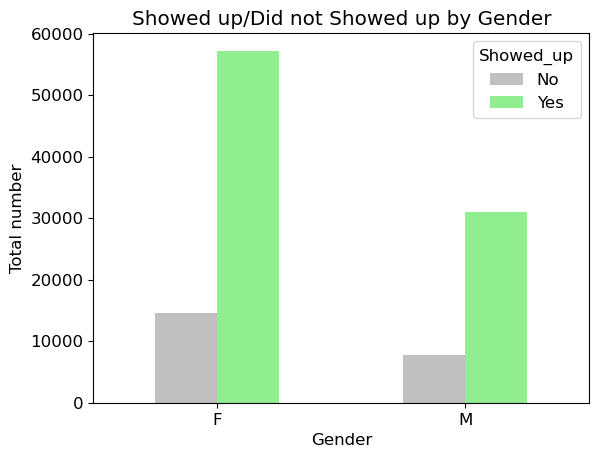

In [33]:
# visualise Number of males and females who show up
df.groupby('Gender').Showed_up.value_counts().unstack().plot(kind='bar',
                    color=['silver','lightgreen'])
plt.title('Showed up/Did not Showed up by Gender')
plt.ylabel('Total number')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

Based on the data, Females are 71840 and males 38687 in number. Females form 65% of the data with males forming 35%.
From the above visual, it can be observed that Females tend to show up for appointment much often than males. Also, females also tend to miss appointment than male. This could be because females are a majority in the dataset and generally speaking, females tend to visit the hospital more often than males. Hence there is a need to investigate proportions for both genders.

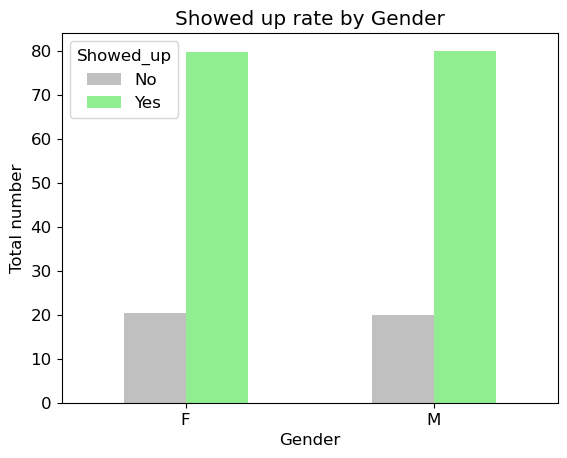

In [34]:
# groupby Gender and calculate show up rate.
df_gender = df.groupby('Gender').Showed_up.value_counts(normalize=True)

# unstack and obtain show up rate in percentage.
df_gender= df_gender.unstack().mul(100)

# visualising the show up rate by Gender
df_gender.plot(kind='bar', color=['silver','lightgreen'])
plt.title('Showed up rate by Gender')
plt.ylabel('Total number')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

From the outputs above, both males and females have equal rates of showing up (80%) and not showing up (20%) at the hospital for medical appoinment. 

###  3. Do patients with handicap show up or not and what is their show up rate as compared with patients without handicap?

Total number per category: 
                    Showed_up
Handicap Showed_up           
0        Yes            86373
         No             21912
1        Yes             1676
         No               366
2        Yes              146
         No                37
3        Yes               10
         No                 3
4        Yes                2
         No                 1
Show up rates: 
Showed_up    No   Yes
Handicap             
0          20.0  80.0
1          18.0  82.0
2          20.0  80.0
3          23.0  77.0
4          33.0  67.0


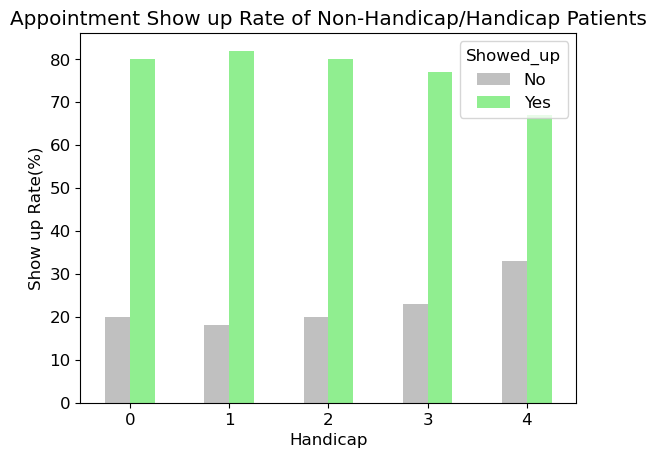

In [35]:
# visualising the show up rate by Handicap using the created Function
visualize(df,'Handicap')

From the chart above, 

Irrespective of the level of Handicap, majority of patients show up for their appointment. 

Level 1 who are extremely less handicap have 1676 showing up and 366 not showing. They have a show up rate  of 82% which is greater than the show up rate (80%) of non-handicap patients. In terms of not showing up, they are doing well with 18% as against 20% for non-handicap patients. 

Those with Handicap level 2 have 146 patients showing up and 37 not showing. They have equal show up rate(80%) and equal rates of not showing up(20%) just like the  non-handicap patients. 

Those with Handicap level 3 have 10 patients showing up and 3 not showing resulting in a show up rate of 77%.

Patients with level 4 have 2 patients showing up out of 3 making the show up rate 67%.

Below, we try to generalize the show up rate for both Handicap and non-handicap patients.

Total number per category: 
                    Showed_up
Handicap Showed_up           
0        Yes            86373
         No             21912
1        Yes             1834
         No               407
Show up rates: 
Showed_up    No   Yes
Handicap             
0          20.0  80.0
1          18.0  82.0


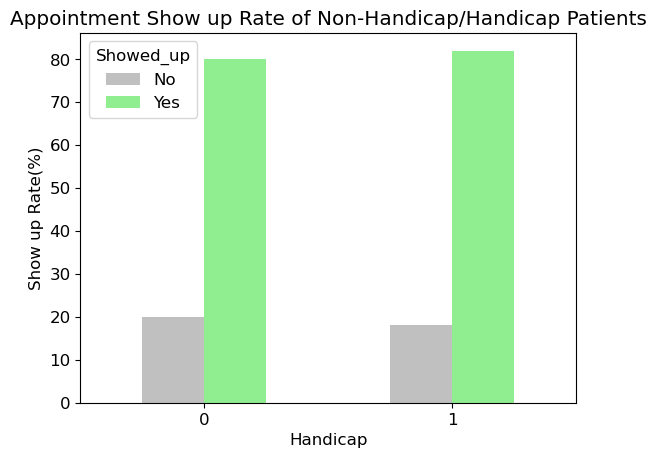

In [36]:
# replacing handicap levels 2,3, and 4 with 1
df_handicap = df.copy()
df_handicap['Handicap'] = df_handicap.Handicap.replace((2,3,4),(1))

# visualising the general show up rate by Handicap using the created Function
visualize(df_handicap,'Handicap')

From the output above, generally, Handicap patients have a high show up rate of 82% for medical appointment and a lower show rate as compared to non-handicap patients.

### 4. Do alcoholic patients show up for their medical appointments and what are their show up rate as compared with patients who are not alcoholics?

In [37]:
# Number of Alcoholic patients
print(f'There are a total of {df[df.Alcoholism ==1].shape[0]} alcholic patient.')

There are a total of 3360 alcholic patient.


Total number per category: 
                      Showed_up
Alcoholism Showed_up           
0          Yes            85524
           No             21642
1          Yes             2683
           No               677
Show up rates: 
Showed_up     No   Yes
Alcoholism            
0           20.0  80.0
1           20.0  80.0


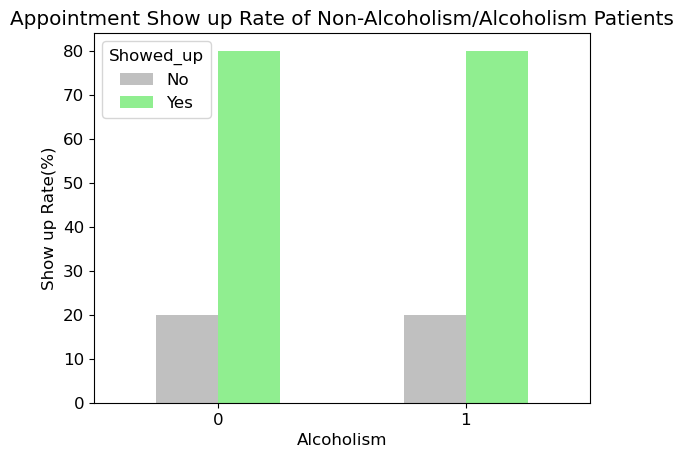

In [38]:
# visualising the show up rate by Alcoholism using the created Function
visualize(df,'Alcoholism')

From the above output and visual, out of 3360 Alcoholic patients, 2683 showed up and 677 did not show up. Alcoholics have approximately 80% show up rate and 20% rate of not showing up which is the same rates as non-alcoholic patients. 

### 5. Do Diabetic patients show up for medical appointments and what are their show up rates  compared with patients who are not diabetic?

In [39]:
# Number of diabetic patients 
print(f'There are a total of {df[df.Diabetes ==1].shape[0]} diabetic patient.')

There are a total of 7943 diabetic patient.


Total number per category: 
                    Showed_up
Diabetes Showed_up           
0        Yes            81694
         No             20889
1        Yes             6513
         No              1430
Show up rates: 
Showed_up    No   Yes
Diabetes             
0          20.0  80.0
1          18.0  82.0


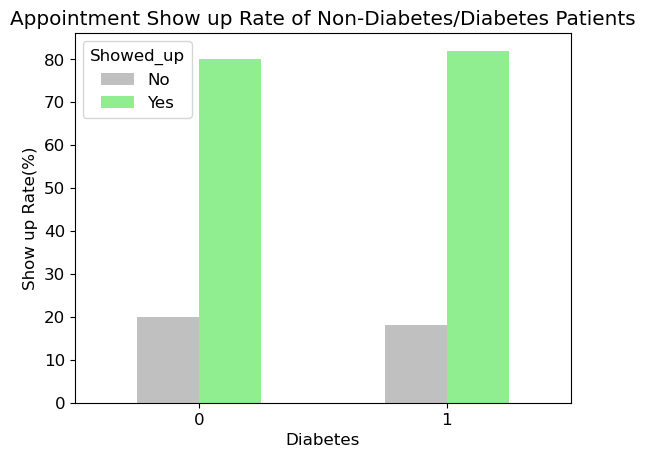

In [40]:
# visualising the show up rate by Diabetic Patients using the created Function
visualize(df,'Diabetes')

From the output and visual above, out of a total of 7943 diabetic patients, 6513 showed and 1430 did not show. Diabetic patients show up with a high show up rate of approximately 82% which is higher than that of non-diabetic patients. They have an 18% rate of not showing up whiich is 2% less than the no show up rate of non-diabetic patients.

### 6. Do Scholarship holding patients show up for medical appointments and what are their show up rates compared with patients who are not on Scholarship?

In [41]:
# Number of Scholarship patients
print(f'There are a total of {df[df.Scholarship ==1].shape[0]} scholarship holding patient')

There are a total of 10861 scholarship holding patient


Total number per category: 
                       Showed_up
Scholarship Showed_up           
0           Yes            79924
            No             19741
1           Yes             8283
            No              2578
Show up rates: 
Showed_up      No   Yes
Scholarship            
0            20.0  80.0
1            24.0  76.0


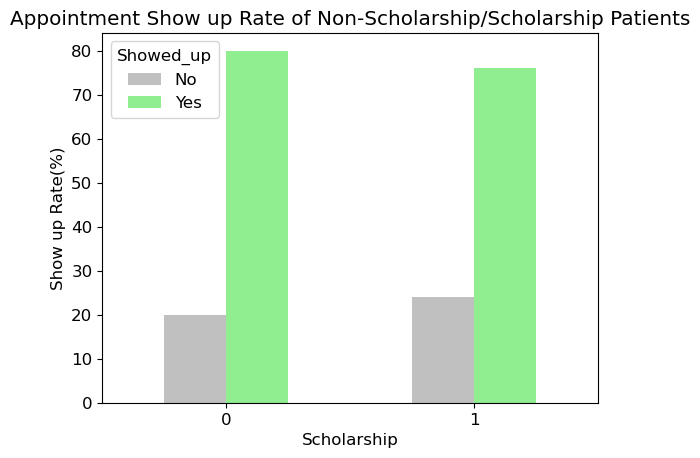

In [42]:
# visualising the show up rate by scholarship Patients using the created Function
visualize(df,'Scholarship')

From above, out of a total of 10861 Scholarship holders, 8283 showed and 2578 did not show. Hence, show up rate of 76% showed and 24% rate of not showing up as against 80% and 20% show up rate and no show up rate for non-scholarship holders.

### 7. Do patients who receive SMS show up for medical appointments and what are their show up rates compared with patients who do not receive sms?

In [43]:
# Number of sms patients
print(f'There are a total of {df[df.SMS_received ==1].shape[0]} patients who received sms')

There are a total of 35482 patients who received sms


Total number per category: 
                        Showed_up
SMS_received Showed_up           
0            Yes            62509
             No             12535
1            Yes            25698
             No              9784
Show up rates: 
Showed_up       No   Yes
SMS_received            
0             17.0  83.0
1             28.0  72.0


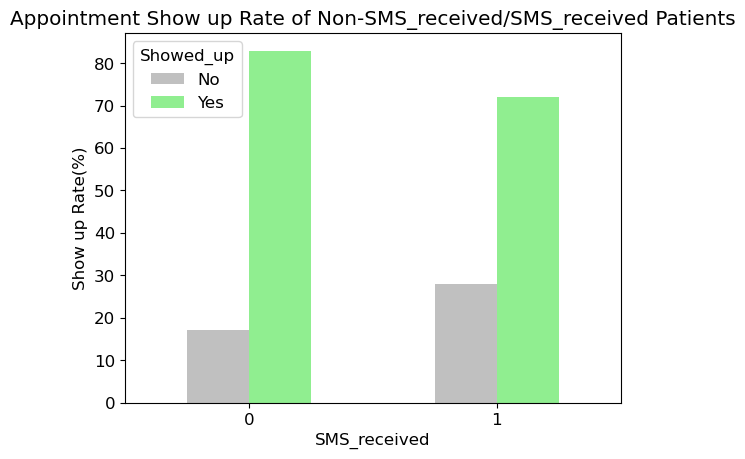

In [44]:
# visualising the show up rate by Patients who received sms using the created Function
visualize(df,'SMS_received')

From above, out of a total of 35482 patients who received sms, 25698 showed and 9784 did not show. Hence 72% showed up rate and 28% rate of not showing up as against 83% show up rate.

### 8. Do patients who have Hypertension show up for medical appointmentsand what are their show up rates compared with patients who do not have Hypertension?

In [45]:
# Number of Hypertension patients 
print(f'There are a total of {df[df.Hypertension ==1].shape[0]} Hypertension patient.')

There are a total of 21801 Hypertension patient.


Total number per category: 
                        Showed_up
Hypertension Showed_up           
0            Yes            70178
             No             18547
1            Yes            18029
             No              3772
Show up rates: 
Showed_up       No   Yes
Hypertension            
0             21.0  79.0
1             17.0  83.0


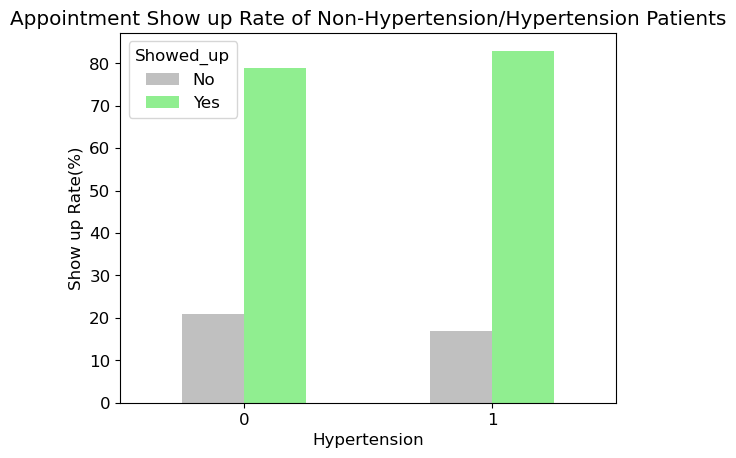

In [46]:
# visualising the show up rate by Hypertension Patients using the created Function
visualize(df,'Hypertension')

From above, Hypertension Patients have a high show up rate of 83%, a 17% no show up rate as against 79% showed up rate and 21% rate of not showing up for Patients without Hypertension.

### Age

In [47]:
# summary statistic of age
df.Age.describe(). round()

count    110526.0
mean         37.0
std          23.0
min           0.0
25%          18.0
50%          37.0
75%          55.0
max         115.0
Name: Age, dtype: float64

In [48]:
# check modal age
df.Age.mode()

0    0
Name: Age, dtype: int64

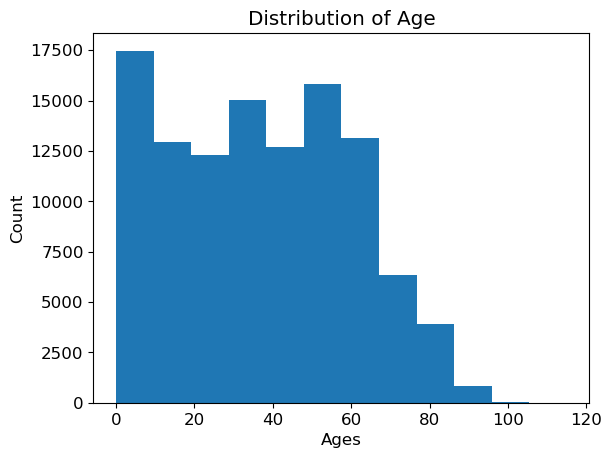

In [49]:
# distribution of age
plt.hist(df.Age,bins=12);
plt.title('Distribution of Age')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.show()

The distribution of age is not normally distributed with the maximum age being 115 and a minimum age of 0. The median age is 37 and the average age is 37. The modal age is 0 having approximately 17500 patients.

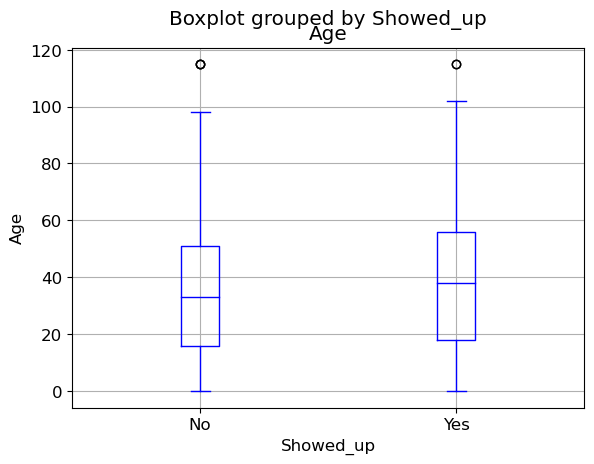

In [50]:
# visualise boxplot distribution of age of those who show up and those who do not
df.boxplot(column ='Age',by='Showed_up', color ='blue');
plt.ylabel('Age')
plt.show()

From the box plot above, those who normally show up include all age groups and those who do not also include all age groups. Both plots are skewed to the right. However, those who do not show up have a lower median and mean as compared to those who show up, implying youths and adults form a majority of this group. To further understand this let's perform some further investigation by answering the question below.

### 9. The Seniors and the youth who is more concern about their health?

In [51]:
# Grouping age into groups 0 - 14, 15 - 24, 25 - 64, 65 - 115 
df = df_handicap
df['Age_groups'] = pd.qcut(df.Age, 4,
                           labels = ['0 - 14', '15 - 24', '25 - 64', '65 - 115'])

# Replacing age groups 0 - 14 Children, 15 - 24 Youth, 25 - 64 Adults, 65 - 115 Seniors
df['Age_groups'] =df['Age_groups'].replace(
    ('0 - 14', '15 - 24', '25 - 64', '65 - 115'),
    ('Children','Youth','Adults','Seniors'))

df.head(2)

,PatientId,AppointmentID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Age_groups
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,Seniors
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,Seniors


Total number per category: 
                      Showed_up
Age_groups Showed_up           
Children   Yes            22519
           No              6347
Youth      Yes            20836
           No              6414
Adults     Yes            21651
           No              5255
Seniors    Yes            23201
           No              4303
Show up rates: 
Showed_up     No   Yes
Age_groups            
Children    22.0  78.0
Youth       24.0  76.0
Adults      20.0  80.0
Seniors     16.0  84.0


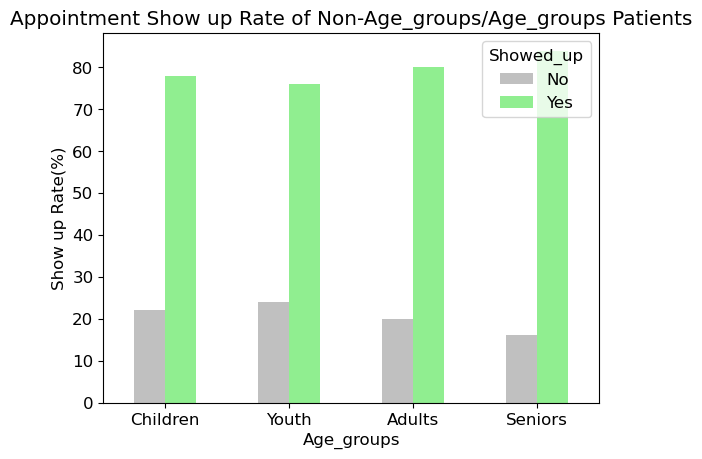

In [52]:
# visualising the show up rate by Age_groups Patients using the created Function
visualize(df,'Age_groups')

<Figure size 1500x1500 with 0 Axes>

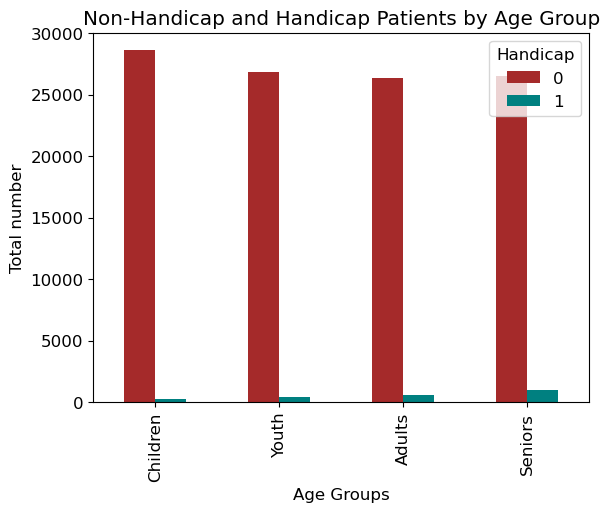

In [53]:
# Visualising Handicap by age groups
plt.figure(figsize=(15,15));
df.groupby('Age_groups')['Handicap'].value_counts().unstack().plot(
    kind='bar', color=['Brown','teal']);
plt.title('Non-Handicap and Handicap Patients by Age Group')
plt.ylabel('Total number')
plt.xlabel('Age Groups')
plt.xticks(rotation=90)
plt.show()

Based on the two charts above, despite seniors having a higher number of Handicap, they tend to have the highest show up rate of 84% and the minimum show up rate of 16%. Youth on the other hand though having a fair number of them being handicap, tend to have the lowest show up rate (76%) among all the the age groups. Generally, seniors are mostly concern about their health issues than youth. 

### 10. What are the correlation between relevant variables?

In [54]:
# changing yes or no for showed up column to 1 and 0 .
# changing M or F for Gender column to 1 and 0.
df['Showed_up'] = df['Showed_up'].replace(('Yes','No'),(1,0))
df['Gender'] = df['Gender'].replace(('M','F'),(1,0))

# changing Showed up data type to int.
df['Showed_up']= df['Showed_up'].astype('int')

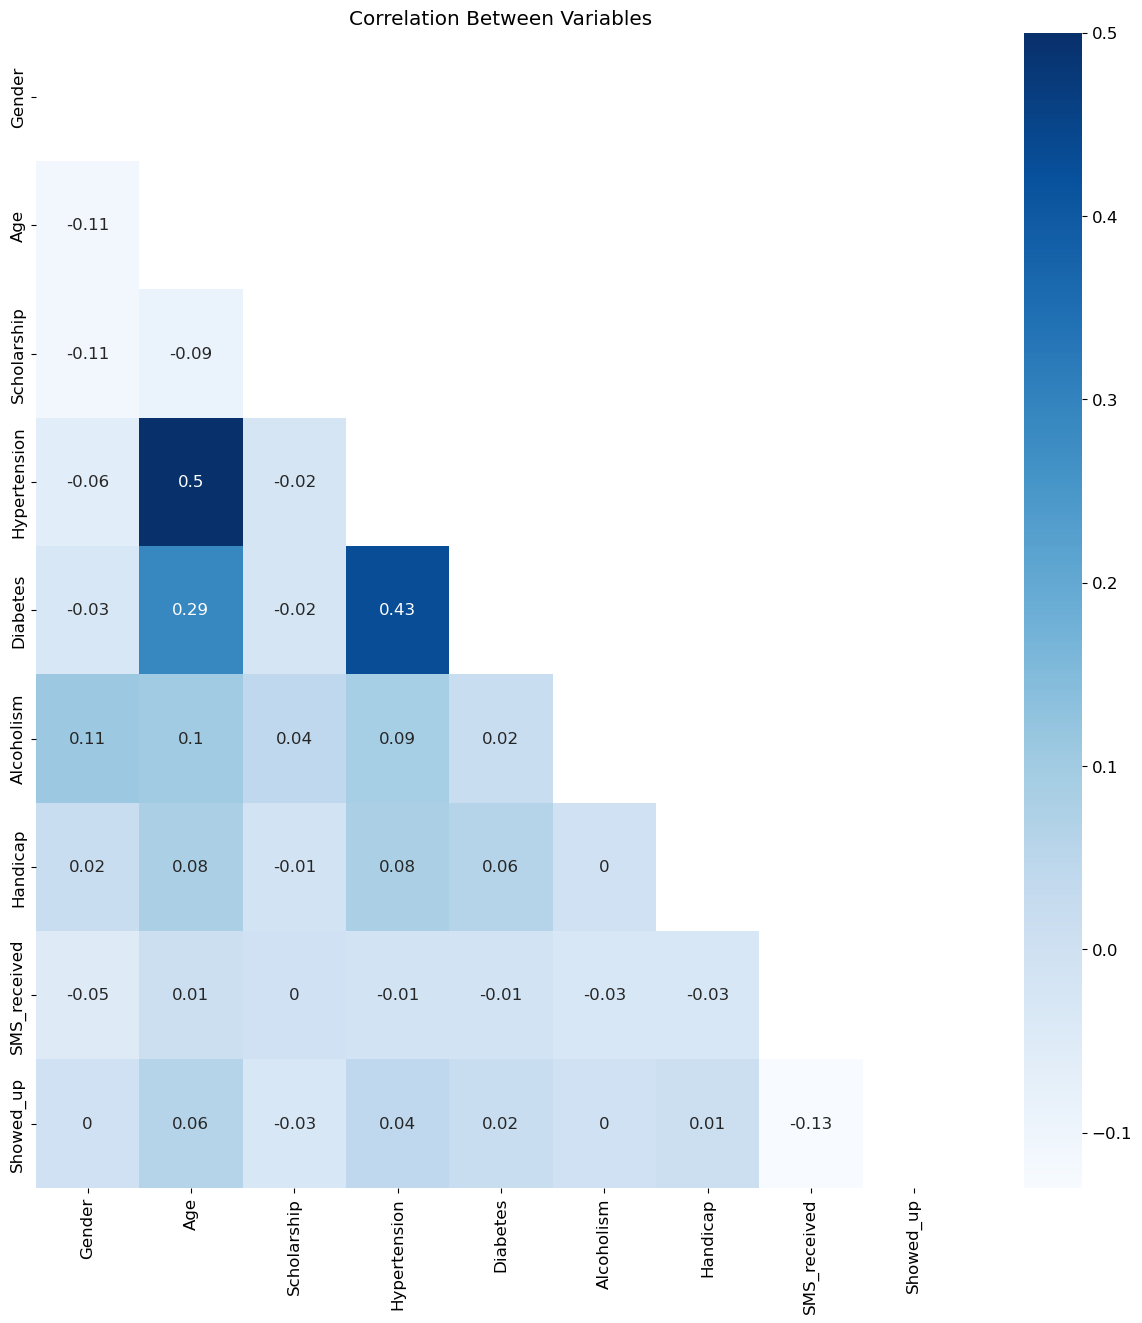

In [57]:
# compute the correlation between variables
corr = df.corr().round(2)

# hide upper diagonal of heatmap since it presents duplicate information
mask = np.triu(np.ones_like(corr,dtype=bool))

# Visualise the correlation between the numerical variables using a heatmap
plt.figure(figsize = (15,15))
sns.heatmap(corr,
            annot = corr, mask = mask,
            cmap='Blues')

plt.title("Correlation Between Variables")
plt.show()

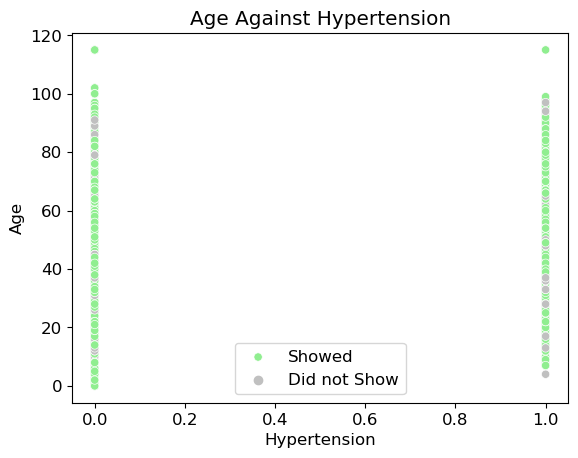

In [56]:
# Visualise the relationship between Age and Hypertension
sns.scatterplot(data = df, 
                x = 'Hypertension',
                y = 'Age',hue = 'Showed_up', 
                palette = ['silver', 'lightgreen'])
plt.title('Age Against Hypertension')
plt.legend(['Showed', 'Did not Show'])
plt.show()

From the heatmap, with exception of Age and Hypertension that has a moderate correlation of 0.5 and Diabetes and Hypertension with a fairly moderate correlation of 0.43, all other variable pairs do not have a correlation. To view the actual trend of the correlation between Age and Hypertension the scatter plot above was generated.

<a id='conclusions'></a>
## Conclusions
To enable a better exploration of the dataset, the exploration of the data set was focused on 10 questions. For easy referencing, these questions are repeated below. The dataset was then explored and and patterns and findings were presented with visuals.

Questions
1. What are the percentages of patients who showed up and those who did not ?
2. Which gender shows up for appoinment the most?
3. Do patients with hadicap show up or not and what is their show up rate as compared with patients without handicap?
4. Do alcoholic patients show up for their medical appointments not and what is their show up rate as compared with patients who are not alcoholic?
5. Do Diabetic patients show up for medical appointments and what is their show up rate as compared with patients without Diabetes?
6. Do Scholarship holding patients show up for medical appointments and what is their show up rate as compared with patients who are not on scholarship?
7. Do patients who receive SMS show up for medical appointments and what are their show up rate as compared with patients who do not receive SMS?
8. Do patients who have Hypertension show up for medical appointmentsand what are their show up rates compared with patients who do not have Hypertension?
9. The Seniors and the youth who is more concern about their health?
10. What are the correlation between relevant variables?

With regards to the percentage of patients who showed up after booking appointments, it was found out that approximately 80% showed for the appointment and 20% do not show for the appointment.

It was also found out that majority of patients show up for medical appointments with females being a larger constituent(65%) of the majority. However, the rate of show up for both males and females for appointments is the same(80% show up rate). 

Also with the question of the showing up potential of Handicap patients, irrespective of the level of Handicap, majority of Handicap patients show up for their appointment. Generally, Handicap patients have a high show up rate of 82% for medical appointment compared to non-handicap patients whose show up rate is 80%. Level 1 who are extremely less handicap have a show up rate of 82% and Handicap level 3 and level 4 have a show up rate of 77% and 67% respectively.

Concerning alcoholic patients show up potential, alcoholics have approximately 80% show up rate which is the same as the show up rates for non-alcoholic patients.

In addition, diabetic patients show up potential is relatively high approximately 82% which is higher than that of non-diabetic patients (80%). 

Sholarship holders rather show a low potential od showing up of 76% showed and 24% as against 80% of non-scholarship holders.

Also, sms reminders results in 72% show up rate as against 83% show up rate for those who did not receive sms.

Hypertension Patients have a high show up rate of 83% as against 79% showed up rate show up rate for Patients without Hypertension.

With regards to age group, despite seniors (age 65 and above) having a higher number of Handicap, they tend to have the highest show up rate of 84%. Youth(age 15 to 24) on the other hand though having a relatively fair number of them being handicap, tend to have the lowest show up rate of 76% among all the age groups. Generally, seniors are mostly concern about their health issues than youth.

Finally, in terms of which variables are correlated, with exception of Age and Hypertension that has a moderate correlation of 0.5 and Diabetes and Hypertension with a fairly moderate correlation of 0.43, all other variable pairs do not have a correlation. Even with these variables a scatter plot shows the correlated values obtained are misleading since no prominent linear trend was established.  

In summary, Hypertention, Diabetic,Alcoholic and Handicap patients have relatively high show up rates. Females tend to visit the hosptital frequently than men, however both genders have equal show up rates. Also despite seniors exhibiting some level of Handicap, they tend to show up more often for their medical appointments as compared to youth. 

#### Limitations

1. No statistical test were conducted hence we cannot conclude that this variables are the actual cause of whether a patient showed up or not.
2. The data only included a one or two times patients information which does not really reflect if patients showed or did not show up due to certain circumstances or establish patients attendance behaviour.
3. This dataset was obtained for only a particular year and months, there is no past data to find out whether upon introducction of sms reminders show up rate increased or decreased over the years.
4. These findings are solely based on this particular dataset of a particular geographical area hence cannot be generalised for all geographical areas.
5. This analysis did not cover the influence of Hospital Location and the influence of appointment day, scheduled day including wether number of days elasped since patient booked appointment and also wether patient was receiving quality healthcare services and wether patients condition was improving or detoriating after each visit. Further research needs to be conducted in thes areas. 